# Time Series Anomaly Detection

This project will use the following dataset:

https://www.kaggle.com/boltzmannbrain/nab/code?datasetId=110&sortBy=voteCount

In [76]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import statsmodels
import matplotlib.pyplot as plt #Data Visualization
import matplotlib.dates as md
# the main library has a small set of functionality
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift,
                                         mean,
                                         seasonal_naive)

dataset = pd.read_csv(
    '../models/nab/artificialWithAnomaly/artificialWithAnomaly/art_daily_jumpsdown.csv',
    encoding='unicode_escape'
)
# print first 10 rows of dataset to better understand general data
dataset.head(10)

,timestamp,value
0,2014-04-01 00:00:00,18.090486
1,2014-04-01 00:05:00,20.359843
2,2014-04-01 00:10:00,21.105470
3,2014-04-01 00:15:00,21.151585
4,2014-04-01 00:20:00,18.137141
5,2014-04-01 00:25:00,21.625661
6,2014-04-01 00:30:00,21.673807
7,2014-04-01 00:35:00,20.245561
8,2014-04-01 00:40:00,19.928333
9,2014-04-01 00:45:00,18.179470


In [77]:
# shows number of rows and columns
dataset.shape

(4032, 2)

In [78]:
# gives general useful info about dataset such as null count and type of each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4032 entries, 0 to 4031
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  4032 non-null   object 
 1   value      4032 non-null   float64
dtypes: float64(1), object(1)
memory usage: 63.1+ KB


In [79]:
# plots data
# dataset['date'] = pd.to_datetime(dataset['timestamp']).dt.date
dataset['timestamp'] = pd.to_datetime(dataset['timestamp'])
dataset.head()

,timestamp,value
0,2014-04-01 00:00:00,18.090486
1,2014-04-01 00:05:00,20.359843
2,2014-04-01 00:10:00,21.105470
3,2014-04-01 00:15:00,21.151585
4,2014-04-01 00:20:00,18.137141


<AxesSubplot:xlabel='timestamp'>

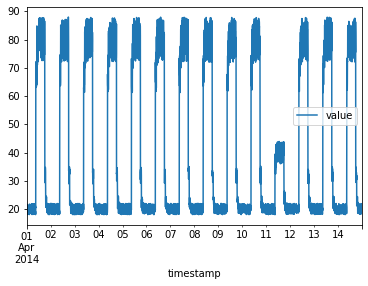

In [80]:
dataset.plot(x='timestamp', y='value')


In [81]:
idf = dataset.set_index(["timestamp"])
idf.head()

,value
timestamp,
2014-04-01 00:00:00,18.090486
2014-04-01 00:05:00,20.359843
2014-04-01 00:10:00,21.105470
2014-04-01 00:15:00,21.151585
2014-04-01 00:20:00,18.137141


## ARIMA MODEL

In [82]:
#Determine rolling statistics
rolmean = idf.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = idf.rolling(window=12).std()
print(rolmean,rolstd)

                         value
timestamp                     
2014-04-01 00:00:00        NaN
2014-04-01 00:05:00        NaN
2014-04-01 00:10:00        NaN
2014-04-01 00:15:00        NaN
2014-04-01 00:20:00        NaN
...                        ...
2014-04-14 23:35:00  20.216653
2014-04-14 23:40:00  20.145783
2014-04-14 23:45:00  20.081592
2014-04-14 23:50:00  19.935939
2014-04-14 23:55:00  20.038057

[4032 rows x 1 columns]                         value
timestamp                    
2014-04-01 00:00:00       NaN
2014-04-01 00:05:00       NaN
2014-04-01 00:10:00       NaN
2014-04-01 00:15:00       NaN
2014-04-01 00:20:00       NaN
...                       ...
2014-04-14 23:35:00  1.299659
2014-04-14 23:40:00  1.338844
2014-04-14 23:45:00  1.345827
2014-04-14 23:50:00  1.268898
2014-04-14 23:55:00  1.258270

[4032 rows x 1 columns]


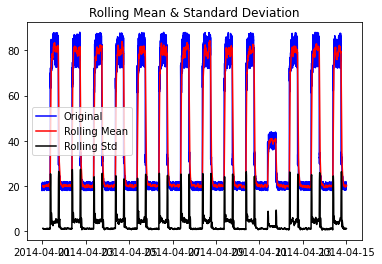

In [83]:
#Plot rolling statistics
orig = plt.plot(idf, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

## DECOMPOSITION

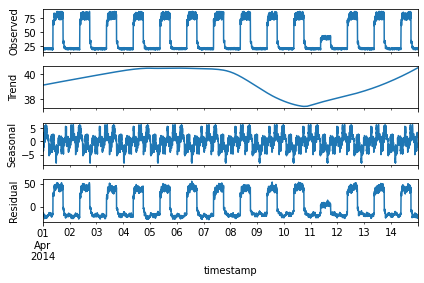

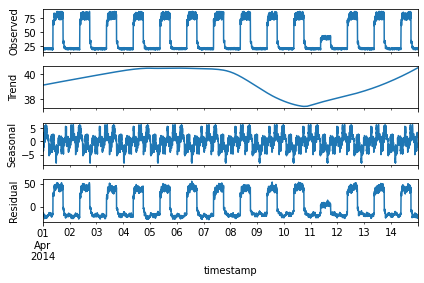

In [84]:
# the main library has a small set of functionality
from stldecompose import decompose, forecast
from stldecompose.forecast_funcs import (naive,
                                         drift,
                                         mean,
                                         seasonal_naive)

decomp = decompose(idf)
decomp.plot()

